In [1]:
import pandas as pd 
import numpy as np
import matplotlib 
from matplotlib import pyplot as plt
matplotlib.rcParams['font.family'] = ['SimHei']
import warnings
warnings.filterwarnings('ignore')
import os

In [4]:
data_path = ('./exercise_data/')
data_name = os.listdir('./exercise_data/')
data_name

['Apple_stock.csv',
 'cars.csv',
 'chipotle.tsv',
 'drinks.csv',
 'Euro2012_stats.csv',
 'iris.csv',
 'second_cars_info.csv',
 'train.csv',
 'US_Crime_Rates_1960_2014.csv',
 'wechart.csv',
 'wind.data']

## 1 读入数据chipotle

In [3]:
chipo = pd.read_csv(data_path+data_name[2],sep='\t')
chipo.head()    # 默认查看前5行
chipo.head(10) # 查看前10行

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


###  1.1  查看行列

In [4]:
print(chipo.columns)
print(chipo.index)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')
RangeIndex(start=0, stop=4622, step=1)


### 1.2 下单最多的商品是什么？

In [5]:
item_sell_num = pd.DataFrame(chipo.groupby('item_name')['quantity'].sum())
print(item_sell_num.idxmax())
item_sell_num = item_sell_num.sort_values('quantity',ascending=False)
item_sell_num.head()


quantity    Chicken Bowl
dtype: object


,quantity
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506
Steak Burrito,386
Canned Soft Drink,351


###  1.3 在item_name这一列中，一共有多少种商品被下单？

In [6]:
# 就是有多少种不同的商品
chipo['item_name'].unique()

array(['Chips and Fresh Tomato Salsa', 'Izze', 'Nantucket Nectar',
       'Chips and Tomatillo-Green Chili Salsa', 'Chicken Bowl',
       'Side of Chips', 'Steak Burrito', 'Steak Soft Tacos',
       'Chips and Guacamole', 'Chicken Crispy Tacos',
       'Chicken Soft Tacos', 'Chicken Burrito', 'Canned Soda',
       'Barbacoa Burrito', 'Carnitas Burrito', 'Carnitas Bowl',
       'Bottled Water', 'Chips and Tomatillo Green Chili Salsa',
       'Barbacoa Bowl', 'Chips', 'Chicken Salad Bowl', 'Steak Bowl',
       'Barbacoa Soft Tacos', 'Veggie Burrito', 'Veggie Bowl',
       'Steak Crispy Tacos', 'Chips and Tomatillo Red Chili Salsa',
       'Barbacoa Crispy Tacos', 'Veggie Salad Bowl',
       'Chips and Roasted Chili-Corn Salsa',
       'Chips and Roasted Chili Corn Salsa', 'Carnitas Soft Tacos',
       'Chicken Salad', 'Canned Soft Drink', 'Steak Salad Bowl',
       '6 Pack Soft Drink', 'Chips and Tomatillo-Red Chili Salsa', 'Bowl',
       'Burrito', 'Crispy Tacos', 'Carnitas Crispy Tacos

### 1.4将item_price转换为浮点数

In [7]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [8]:
print('#'*50)
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:-1]))  # $ 
chipo.head()


##################################################


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


### 1.5 每单的收入

In [9]:
chipo['revenue'] = chipo['quantity'] * chipo['item_price']
chipo.head()

,order_id,quantity,item_name,choice_description,item_price,revenue
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,33.96


# 2 导入数据Euro2012_stats.csv

In [10]:
#%%
europe_football = pd.read_csv('./exercise_data/Euro2012_stats.csv')
europe_football.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


### 2.1 进球数大于6球的球队


In [11]:
europe_football[europe_football.Goals > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


### 2.2 选取以字母G开头的球队数据

In [12]:
europe_football[europe_football.Team.str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


###  2.3 选择前7列

In [13]:
europe_football.iloc[:,:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


### 2.4 找到英格兰(England)、意大利(Italy)和俄罗斯(Russia)的射正率(Shooting Accuracy)

In [14]:
a = europe_football.loc[europe_football['Team'].isin(['England','Italy','Russia'])]
a[['Team','Shooting Accuracy']]
# euro12.loc[euro12.Team.isin(['England', 'Italy', 'Russia']), ['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# 3 导入红酒数据

In [15]:
drink = pd.read_csv('./exercise_data/drinks.csv')
drink.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


### 3.1 哪个大陆(continent)平均消耗的啤酒(beer)更多？

In [16]:
drink.groupby('continent')['beer_servings'].mean().idxmax()

'EU'

### 3.2 打印出每个大陆(continent)的红酒消耗(wine_servings)的描述性统计值

In [25]:
drink.head()
drink.describe() # 没有区分大陆
# 区分不同的大陆
drink.groupby('continent')['wine_servings'].describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,53.0,16.264151,38.846419,0.0,1.0,2.0,13.00,233.0
AS,44.0,9.068182,21.667034,0.0,0.0,1.0,8.00,123.0
EU,45.0,142.222222,97.421738,0.0,59.0,128.0,195.00,370.0
OC,16.0,35.625000,64.555790,0.0,1.0,8.5,23.25,212.0
SA,12.0,62.416667,88.620189,1.0,3.0,12.0,98.50,221.0


###  3.3  打印出每个大陆每种酒类别的消耗中位数

In [28]:
drink.head()
drink.groupby('continent')['beer_servings','wine_servings'].median()

,beer_servings,wine_servings
continent,,
AF,32.0,2.0
AS,17.5,1.0
EU,219.0,128.0
OC,52.5,8.5
SA,162.5,12.0


### 3.4  打印出每个大陆对spirit饮品消耗的平均值，最大值和最小值

In [31]:
drink.groupby('continent')['spirit_servings','beer_servings'].agg(['mean','max','min'])  # agg函数的使用

spirit_servings          beer_servings         
                     mean  max min          mean  max min
continent                                                
AF              16.339623  152   0     61.471698  376   0
AS              60.840909  326   0     37.045455  247   0
EU             132.555556  373   0    193.777778  361   0
OC              58.437500  254   0     89.687500  306   0
SA             114.750000  302  25    175.083333  333  93

# 4-Apply函数 crime-usa

In [33]:
path4 = './exercise_data/US_Crime_Rates_1960_2014.csv'    # "US_Crime_Rates_1960_2014.csv"
crime = pd.read_csv(path4)
crime.head()

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


In [34]:
### 4.1 查看每一列的数据类型
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Year                55 non-null     int64
 1   Population          55 non-null     int64
 2   Total               55 non-null     int64
 3   Violent             55 non-null     int64
 4   Property            55 non-null     int64
 5   Murder              55 non-null     int64
 6   Forcible_Rape       55 non-null     int64
 7   Robbery             55 non-null     int64
 8   Aggravated_assault  55 non-null     int64
 9   Burglary            55 non-null     int64
 10  Larceny_Theft       55 non-null     int64
 11  Vehicle_Theft       55 non-null     int64
dtypes: int64(12)
memory usage: 5.3 KB


### 4.2将year数据类型转为datetime64

In [51]:
crime.Year = pd.to_datetime(crime.Year,format='%Y')
crime.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Year                55 non-null     datetime64[ns]
 1   Population          55 non-null     int64         
 2   Total               55 non-null     int64         
 3   Violent             55 non-null     int64         
 4   Property            55 non-null     int64         
 5   Murder              55 non-null     int64         
 6   Forcible_Rape       55 non-null     int64         
 7   Robbery             55 non-null     int64         
 8   Aggravated_assault  55 non-null     int64         
 9   Burglary            55 non-null     int64         
 10  Larceny_Theft       55 non-null     int64         
 11  Vehicle_Theft       55 non-null     int64         
dtypes: datetime64[ns](1), int64(11)
memory usage: 5.3 KB


### 4.3 将列Year设置为数据框的索引

In [53]:
crime = crime.set_index('Year')
crime.head()

,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,
1960-01-01,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961-01-01,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962-01-01,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963-01-01,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964-01-01,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


### 4.4 删除名为Total的列

In [71]:
# crime.drop(columns='Total')
# del crime['Total']
crime.head()

,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,
1960-01-01,179323175,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961-01-01,182992000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962-01-01,185771000,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963-01-01,188483000,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964-01-01,191141000,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


### 4.5 每10年求和

In [68]:
# resample函数的使用
a = crime.resample('10AS')['Population'].sum()
a = pd.DataFrame(a)
a.iloc[0:5].sum()
# crime['1960':'2009'].sum()
# 11968410917

Population    11968410917
dtype: int64

### 4.6 每列的最大值 所在的时间

In [76]:
crime.idxmax()
crime.idxmin()

Population           1960-01-01
Violent              1960-01-01
Property             1960-01-01
Murder               1962-01-01
Forcible_Rape        1960-01-01
Robbery              1961-01-01
Aggravated_assault   1960-01-01
Burglary             1960-01-01
Larceny_Theft        1960-01-01
Vehicle_Theft        1960-01-01
dtype: datetime64[ns]

# 5数据的合并

In [79]:
# 运行以下代码
raw_data_1 = {
        'subject_id': ['1', '2', '3', '4', '5'],
        'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'], 
        'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']}

raw_data_2 = {
        'subject_id': ['4', '5', '6', '7', '8'],
        'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'], 
        'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}

raw_data_3 = {
        'subject_id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}
raw_data_3

{'subject_id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
 'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}

### 5.1 将上述的数据框分别命名为data1, data2, data3

In [83]:
data1 = pd.DataFrame(raw_data_1)
data2 = pd.DataFrame(raw_data_2)
data3 = pd.DataFrame(raw_data_3)

data1

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches


### 5.2 数据拼接 pd.concat

In [85]:
# 将data1 与data2 拼接按照列
data12 = pd.concat([data1,data2],axis=0) # axis=0按照index拼接，也就是竖着拼接
data12

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


### 5.3步 按照subject_id的值对data12和data3作合并

In [87]:
merge_data = pd.merge(data12,data3,on='subject_id')  # 参数how 
merge_data

,subject_id,first_name,last_name,test_id
0,1,Alex,Anderson,51
1,2,Amy,Ackerman,15
2,3,Allen,Ali,15
3,4,Alice,Aoni,61
4,4,Billy,Bonder,61
5,5,Ayoung,Atiches,16
6,5,Brian,Black,16
7,7,Bryce,Brice,14
8,8,Betty,Btisan,15


### 5.4  对data1和data2按照subject_id作连接

In [88]:
pd.merge(data1,data2,on='subject_id',how='inner')  # how = 'inner '的作用就是找到subject_id相同的部分进行合并

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,4,Alice,Aoni,Billy,Bonder
1,5,Ayoung,Atiches,Brian,Black


In [89]:
pd.merge(data1,data2,on='subject_id',how='outer')  # outer 就是所有可能的情况全部呈现

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,1,Alex,Anderson,NaN,NaN
1,2,Amy,Ackerman,NaN,NaN
2,3,Allen,Ali,NaN,NaN
3,4,Alice,Aoni,Billy,Bonder
4,5,Ayoung,Atiches,Brian,Black
5,6,NaN,NaN,Bran,Balwner
6,7,NaN,NaN,Bryce,Brice
7,8,NaN,NaN,Betty,Btisan


# 6 数据的统计

#### parse_dates 的使用  官方文档解释
* parse_dates：bool or list of int or names or list of lists or dict, default False.The behavior is as follows:
* boolean. If True -> try parsing the index. 
* list of int or names. e.g. If [1, 2, 3] -> try parsing columns 1, 2, 3 each as a separate date column.
* list of lists. e.g. If [[1, 3]] -> combine columns 1 and 3 and parse as a single date column.
* dict, e.g. {‘foo’ : [1, 3]} -> parse columns 1, 3 as date and call result ‘foo’
* If a column or index cannot be represented as an array of datetimes, say because of an unparsable value or a mixture of timezones, the column or index will be returned unaltered as an object data type. For non-standard datetime parsing, use pd.to_datetime after pd.read_csv. To parse an index or column with a mixture of timezones, specify date_parser to be a partially-applied pandas.to_datetime() with utc=True. See Parsing a CSV with mixed timezones for more.

Note: A fast-path exists for iso8601-formatted dates.
####  将时间相关的列进行合并或者是分解，作为新的列


## 6.1 读取数据并将时间合并

In [2]:
data = pd.read_table('./exercise_data/wind.data',sep='\s+',parse_dates=[[0,1,2]])  
data.tail()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79
6573,1978-12-31,20.33,17.41,27.29,9.59,12.08,10.13,19.25,11.63,11.58,11.38,12.08,22.08


## 6.2 时间上存在问题，修复该问题

In [3]:
# 时间上存在什么问题 开始时间是对的结束时间有问题
new_date = pd.date_range(start='1978-01-01',freq='D',periods=data.shape[0])
new_date = list(reversed(new_date))
data.Yr_Mo_Dy = new_date 
# 月份顺序反了  做排序
data['year'] = data.Yr_Mo_Dy.apply(lambda x: int(x.year))
data['month'] = data.Yr_Mo_Dy.apply(lambda x: int(x.month))
data['day'] = data.Yr_Mo_Dy.apply(lambda x: int(x.day))

# data.Yr_Mo_Dy[0].year
data = data.sort_values(['year','month','day'],ascending=[True,True,True])
data = data.drop(columns=['year','month','day'])
data

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
6573,1978-01-01,20.33,17.41,27.29,9.59,12.08,10.13,19.25,11.63,11.58,11.38,12.08,22.08
6572,1978-01-02,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79
6571,1978-01-03,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6570,1978-01-04,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6569,1978-01-05,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,1995-12-27,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
3,1995-12-28,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
2,1995-12-29,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1,1995-12-30,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83


## 6.3 将日期设置为索引

In [4]:
data = data.set_index('Yr_Mo_Dy')
data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6574 entries, 1978-01-01 to 1995-12-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RPT     6568 non-null   float64
 1   VAL     6571 non-null   float64
 2   ROS     6572 non-null   float64
 3   KIL     6569 non-null   float64
 4   SHA     6572 non-null   float64
 5   BIR     6574 non-null   float64
 6   DUB     6571 non-null   float64
 7   CLA     6572 non-null   float64
 8   MUL     6571 non-null   float64
 9   CLO     6573 non-null   float64
 10  BEL     6574 non-null   float64
 11  MAL     6570 non-null   float64
dtypes: float64(12)
memory usage: 667.7 KB


## 6.4 缺失值统计

In [5]:
# 每一列的缺失值个数
data.isnull().sum()


RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

## 6.5 计算所有数据的平均值

In [6]:
data.mean(axis=1) #
data.mean(axis=0) # axis = 0 
data.mean().mean()

10.227982360836924

## 6.6 统计每个地区的基础统计信息


In [7]:
data.describe()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,6568.000000,6571.000000,6572.000000,6569.000000,6572.000000,6574.000000,6571.000000,6572.000000,6571.000000,6573.000000,6574.000000,6570.000000
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
25%,8.120000,6.670000,8.000000,3.580000,6.750000,4.000000,6.000000,5.090000,5.370000,5.330000,8.710000,10.710000
50%,11.710000,10.170000,10.920000,5.750000,9.960000,6.830000,9.210000,8.080000,8.170000,8.290000,12.500000,15.000000
75%,15.920000,14.040000,14.670000,8.420000,13.540000,9.670000,12.960000,11.420000,11.190000,11.630000,16.880000,19.830000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000


In [8]:
data.T.describe()

Yr_Mo_Dy,1978-01-01,1978-01-02,1978-01-03,1978-01-04,1978-01-05,1978-01-06,1978-01-07,1978-01-08,1978-01-09,1978-01-10,...,1995-12-22,1995-12-23,1995-12-24,1995-12-25,1995-12-26,1995-12-27,1995-12-28,1995-12-29,1995-12-30,1995-12-31
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,...,12.00000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,11.000000,11.000000,11.000000
mean,15.402500,15.367500,14.890000,15.150000,16.708333,6.523333,5.729167,10.823333,15.613333,7.000833,...,10.47750,9.897500,10.487500,10.385000,8.240000,10.630000,6.619167,11.641818,11.336364,13.018182
std,5.702483,5.540437,5.756836,9.687857,7.868076,4.304510,3.583263,7.195039,3.850840,3.237337,...,3.44261,2.905954,3.547237,3.072114,2.998063,2.445356,3.198126,3.681912,3.188994,2.808875
min,9.590000,9.130000,8.710000,5.000000,8.080000,1.960000,0.750000,4.790000,9.500000,2.460000,...,6.54000,4.750000,5.910000,4.960000,4.420000,6.170000,1.790000,6.170000,6.500000,9.290000
25%,11.530000,12.375000,10.477500,9.095000,13.802500,3.070000,4.102500,5.840000,12.987500,5.077500,...,8.48750,7.977500,7.620000,8.237500,6.345000,9.807500,4.570000,9.315000,9.730000,10.540000
50%,12.080000,13.455000,14.210000,13.895000,15.025000,4.540000,5.230000,10.040000,15.395000,6.795000,...,9.35500,10.065000,9.685000,9.395000,7.810000,11.170000,5.855000,11.250000,10.830000,13.170000
75%,19.520000,18.185000,17.035000,16.700000,17.302500,10.722500,7.365000,11.970000,17.495000,8.765000,...,11.52250,11.267500,11.792500,13.572500,10.137500,12.170000,9.117500,12.730000,13.225000,15.000000
max,27.290000,28.790000,29.580000,41.460000,40.080000,13.830000,13.960000,31.710000,22.210000,13.080000,...,19.50000,15.370000,16.620000,14.290000,13.210000,13.330000,11.750000,18.500000,17.540000,18.500000


## 6.7 计算每一个地区 1月份的平均风速

547.8333333333334

In [16]:
data.head()
# data.resample('M').mean()  # 将所有的月份求均值
# data_month_mean.resample('Y').mean()         # 每年求均值
# data_month_mean.asfreq('M')                  
data_month_mean.groupby(data_month_mean.index.month).mean()


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1978-01-31,16.175484,13.748065,15.635161,7.094839,11.398710,9.241613,12.077419,10.194839,10.616774,11.028710,13.859677,21.371613
1978-02-28,16.486786,14.873214,13.716786,7.395357,11.541786,8.788929,11.664286,9.585357,10.702143,10.676786,17.193929,20.655357
1978-03-31,10.009355,9.074516,9.365806,4.898387,8.764194,6.979677,8.345484,7.640000,8.560000,8.503226,14.416452,17.640645
1978-04-30,11.123333,11.140333,10.711667,5.719667,10.655333,9.263000,10.712333,9.804000,10.093000,9.094333,15.828000,19.290000
1978-05-31,9.064839,7.741935,8.574839,4.273226,6.881935,5.784839,5.635806,5.026452,7.184839,5.446774,10.158710,12.312258
...,...,...,...,...,...,...,...,...,...,...,...,...
1995-08-31,9.612581,8.424000,10.452581,5.806667,9.315161,6.317742,7.512333,7.958065,7.981290,8.463226,11.626129,12.141935
1995-09-30,11.353000,10.031667,10.560333,6.098667,8.938000,6.695333,7.042000,7.448667,7.439667,7.476000,11.444667,10.399000
1995-10-31,10.581667,10.890645,10.445161,7.180000,10.313226,8.803548,9.508387,9.487097,10.199667,10.874194,15.884194,15.418710


## 6.8 按照年为单位进行抽样

In [22]:
# 每年抽一条数据
data.sample(n=10)  # 随机抽样
data.groupby(data.index.year).sample(n=1)  # 分组每年随机抽样

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1978-02-13,16.79,12.79,18.38,7.41,8.25,7.67,12.08,10.00,11.04,12.75,16.00,17.88
1979-11-25,19.38,17.79,15.96,6.04,10.75,9.71,7.58,5.79,7.25,5.71,8.25,13.13
1980-03-28,22.04,20.71,17.46,10.21,18.25,13.62,11.54,16.29,13.62,12.50,21.54,21.46
1981-11-19,7.46,6.04,9.00,2.62,4.50,2.67,4.67,3.04,3.79,0.92,6.08,6.54
1982-04-14,10.00,8.25,7.75,4.79,10.58,6.21,9.50,10.96,9.67,8.58,14.71,23.16
1983-07-28,5.09,3.13,7.62,3.00,4.21,1.63,3.21,1.79,2.79,0.96,8.92,10.75
1984-04-24,10.54,10.71,19.62,3.42,5.13,2.58,6.17,2.54,3.58,2.58,6.54,6.92
1985-10-07,3.96,5.83,7.46,2.04,6.75,3.75,5.79,5.54,5.46,5.37,13.70,13.96
1986-04-28,3.37,6.67,7.62,4.83,9.46,7.33,10.34,7.62,9.87,8.58,12.50,20.21


## 6.9按照月为单位进行抽样

In [29]:
data.groupby(data.index.month).sample(n=1) # 这样的话，只能抽样12条数据
data.groupby([data.index.year,data.index.month]).sample(n=1) # 这样的话，只能抽样12条数据
# data.query 也很方便

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1978-01-25,26.63,24.79,24.79,18.16,23.13,19.58,19.92,19.04,19.75,21.50,23.04,34.59
1978-02-12,13.88,11.67,8.79,4.96,7.87,5.37,11.08,7.21,7.29,6.92,16.21,20.75
1978-03-06,7.33,8.87,5.00,2.13,6.50,5.13,2.42,4.17,3.58,5.83,14.50,13.67
1978-04-24,15.21,16.21,17.04,8.58,15.63,15.37,15.29,14.33,15.29,13.33,22.58,25.96
1978-05-03,11.54,5.54,7.41,4.67,7.62,6.17,8.87,5.25,7.83,6.17,11.58,16.88
...,...,...,...,...,...,...,...,...,...,...,...,...
1995-08-01,11.29,6.34,6.92,6.71,12.12,7.79,7.92,8.71,9.83,9.17,12.42,15.71
1995-09-08,14.04,11.96,14.96,7.87,10.75,8.83,13.75,11.96,11.08,11.46,12.17,17.50
1995-10-15,11.42,9.46,13.46,6.17,6.83,5.79,7.75,6.50,7.04,9.38,11.29,11.34


# 7数据可视化

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#使用%matplotlib命令可以将matplotlib的图表直接嵌入到Notebook之中
%matplotlib inline 

In [34]:
data = pd.read_csv('./exercise_data/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 7.1 绘制男女比例的扇形图

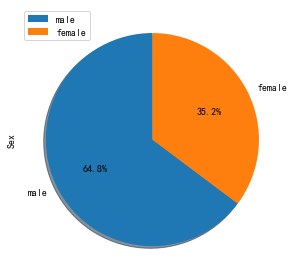

In [63]:
data.set_index('PassengerId')
num_males_females = data['Sex'].value_counts()
males = (data['Sex']=='male').sum()
males
type(num_males_females)
df_males_femals = pd.DataFrame(num_males_females)
df_males_femals.plot.pie(shadow=True,subplots=True,startangle = 90, autopct = '%1.1f%%')
plt.tight_layout()

## 7.2 绘制乘客的票价与年龄和性别的散点图

(-5.0, 85.0)

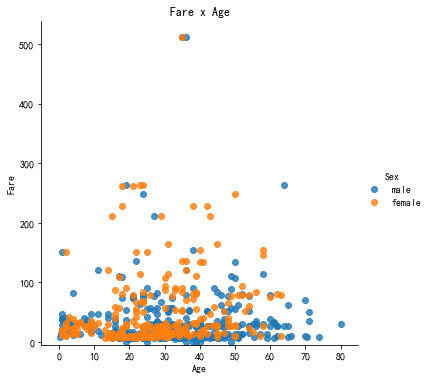

In [67]:
lm = sns.lmplot(x = 'Age', y = 'Fare', data = data, hue = 'Sex', fit_reg=False)  # 这个好用  热力图什么也用这个
lm.set(title = 'Fare x Age') # 标题
axes = lm.axes
axes[0,0].set_ylim(-5,)
axes[0,0].set_xlim(-5,85)


## 7.3 绘制各种票价及售卖次数直方图

array([[<AxesSubplot:title={'center':'Fare'}>]], dtype=object)

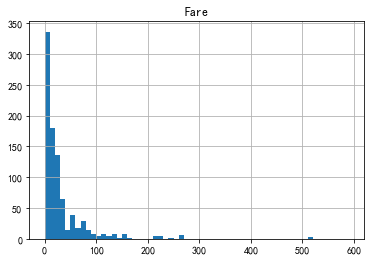

In [84]:
data 
df_Fare = data['Fare'].sort_values()
df = pd.DataFrame(df_Fare)
bins = np.arange(0,600,10)
df.hist(bins=bins)


# 8 时间序列

In [88]:
apple = pd.read_csv('./exercise_data/Apple_stock.csv')
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


In [92]:
# 查看数据类型
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

In [97]:
# 将date 数据转换为事件类型
apple['Date'] = apple['Date'].astype('datetime64')
apple['Date'] = pd.to_datetime(apple['Date'])
apple.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object

In [100]:
# 将date设置为索引
apple = apple.set_index('Date')
apple.head()


,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


In [103]:
# 检测有没有重复的日期
apple.index.is_unique

True

In [106]:
# 将日期设置为升序
apple.sort_index().head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


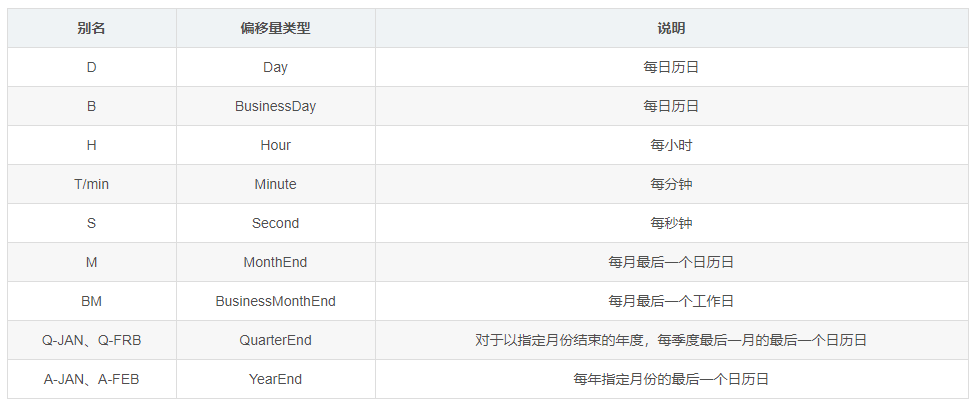

In [128]:
# 找到每个月最后一交易日 bussiness day 
apple_month = apple.resample('BM').mean()        # 需要掌握 时间表示简写
apple_month

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,30.481538,30.567692,30.443077,30.443077,2.586252e+07,0.473077
1981-01-30,31.754762,31.826667,31.654762,31.654762,7.249867e+06,0.493810
1981-02-27,26.480000,26.572105,26.407895,26.407895,4.231832e+06,0.411053
1981-03-31,24.937727,25.016818,24.836364,24.836364,7.962691e+06,0.387727
1981-04-30,27.286667,27.368095,27.227143,27.227143,6.392000e+06,0.423333
...,...,...,...,...,...,...
2014-03-31,533.593333,536.453810,530.070952,533.214286,5.954403e+07,75.750000
2014-04-30,540.081905,544.349048,536.262381,541.074286,7.660787e+07,76.867143
2014-05-30,601.301905,606.372857,598.332857,603.195714,6.828177e+07,86.058571


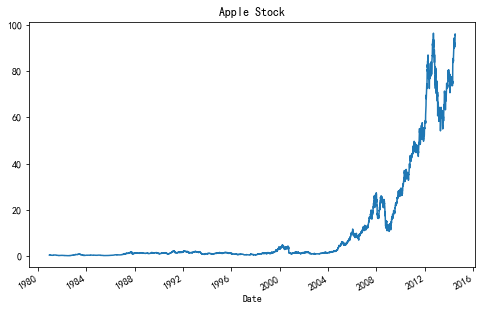

In [131]:
# 按照时间顺序可视化Adj Close值
appl_open = apple['Adj Close'].plot(title = "Apple Stock")

# changes the size of the graph
fig = appl_open.get_figure()
fig.set_size_inches(8, 5)

# 9 数据删除 缺失值的常见处理

In [132]:
data = pd.read_csv('./exercise_data/iris.csv')
data.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [133]:
iris = pd.read_csv('./exercise_data/iris.csv',names = ['sepal_length','sepal_width', 'petal_length', 'petal_width', 'class'])
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [134]:
# 缺失值判断
pd.isnull(iris).sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [136]:
iris.head(20)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [137]:
# 将列petal_length的第10到19行设置为缺失值
iris['petal_length'].iloc[10:19] = np.nan
iris.head(20)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [140]:
#将缺失值全部替换为1.0
iris.fillna(1,inplace=True)
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [142]:
# 删除列class
del iris['class']

In [144]:
# 将数据框前三行设置为缺失值
iris.iloc[:3] =np.nan
iris

,sepal_length,sepal_width,petal_length,petal_width
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [145]:
# 删除有缺失值的行
iris = iris.dropna(how='any')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2


# 后续会加入引入真实案列，并利用pandas进行分析